# Table of contents

7. [Model Testing](#ModelTesting)
    1. [Setting models](#SettingModels)
    2. [Testing models](#TestingModels)
    3. [Grid search optimization](#GridSearch)
    4. [Visualizing model](#VisualModel)
8. [Running Model on Test Data](#RunningModel)

# 7) Model Testing<a name="ModelTesting"></a>

### Setting models<a name="SettingModels"></a>


In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LassoCV, Lasso, RidgeCV, Ridge, ElasticNetCV
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PowerTransformer

from IPython.display import display
pd.options.display.max_columns = None

%matplotlib inline

In [2]:
## Importing data
train = pd.read_csv('../datasets/exports/train_clean.csv')
test = pd.read_csv('../datasets/exports/test_clean.csv')

In [3]:
## Setting X & y
train_filter = ['Neighborhood_Edwards', 'Neighborhood_IDOTRR', 'Neighborhood_NAmes',
                'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'TotalArea',
       'QualMetric', 'TotalBaths', 'PorchArea','mansion','YearRemod/Add','SalePriceLog','SalePrice']
df = train[train_filter].dropna() ## Switching to a more manageable dataframe here
y = df['SalePriceLog']
X = df[train_filter].drop(columns=['SalePriceLog','SalePrice'])

In [4]:
## Instantiating models and transformers I want to test out
lr = LinearRegression()
lasso = LassoCV(cv=5)
ridge = RidgeCV(cv=5)
elast = ElasticNetCV(cv=5)
SS = StandardScaler()
pt= PowerTransformer()

### Testing models<a name="TestingModels"></a>

In [5]:
## Printout of key scores I want to evaluate my model with
## NO POWER TRANSFORMATION

X_scaled = SS.fit_transform(X)

print("Linear Regression\nCross Val Scores: ",
      cross_val_score(lr, X_scaled, y, cv=5))
print("Avg. CV Score: ", round(cross_val_score(lr, X_scaled, y, cv=5).mean(),5))

print("\nLasso\nCross Val Score: ",
      cross_val_score(lasso, X_scaled, y, cv=5))
print("Avg. CV Score: ", round(cross_val_score(lasso, X_scaled, y, cv=5).mean(),5))

print("\nRidge\nCross Val Score: ", 
      cross_val_score(ridge, X_scaled, y, cv=5))
print("Avg. CV Score: ", round(cross_val_score(ridge, X_scaled, y, cv=5).mean(),5))

print("\nElastic Net\nCross Val Score: ", 
      cross_val_score(elast, X_scaled, y, cv=5))
print("Avg. CV Score: ", round(cross_val_score(elast, X_scaled, y, cv=5).mean(),5))

#### I liked Ridge though they were all VERY similar

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Linear Regression
Cross Val Scores:  [0.85402357 0.8754069  0.89684612 0.8177542  0.89007159]
Avg. CV Score:  0.86682

Lasso
Cross Val Score:  [0.85399199 0.87552365 0.89660687 0.81761253 0.89031015]
Avg. CV Score:  0.86681

Ridge
Cross Val Score:  [0.85405782 0.87548454 0.89688957 0.81744141 0.89037612]
Avg. CV Score:  0.86685

Elastic Net
Cross Val Score:  [0.85399479 0.87552873 0.89661017 0.8175968  0.89042783]
Avg. CV Score:  0.86683


In [6]:
## Same test but trying out the PowerTransformer
## POWER TRANSFORMATION
X_scaled_pt = pt.fit_transform(X)

## Printout of key scores I want to evaluate my model with
print("Linear Regression\nCross Val Scores: ",
      cross_val_score(lr, X_scaled, y, cv=5))

print("Avg. CV Score: ", round(cross_val_score(lr, X_scaled, y, cv=5).mean(),5))
print("\nLasso\nCross Val Score: ",
      cross_val_score(lasso, X_scaled, y, cv=5))

print("Avg. CV Score: ", round(cross_val_score(lasso, X_scaled, y, cv=5).mean(),5))
print("\nRidge\nCross Val Score: ", 
      cross_val_score(ridge, X_scaled, y, cv=5))

print("Avg. CV Score: ", round(cross_val_score(ridge, X_scaled, y, cv=5).mean(),5))
print("\nElastic Net\nCross Val Score: ", 
      cross_val_score(elast, X_scaled, y, cv=5))

print("Avg. CV Score: ", round(cross_val_score(elast, X_scaled, y, cv=5).mean(),5))

#### Ridge, with the power transformation, seems marginally better than the others

Linear Regression
Cross Val Scores:  [0.85402357 0.8754069  0.89684612 0.8177542  0.89007159]
Avg. CV Score:  0.86682


/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)



Lasso
Cross Val Score:  [0.85399199 0.87552365 0.89660687 0.81761253 0.89031015]
Avg. CV Score:  0.86681

Ridge
Cross Val Score:  [0.85405782 0.87548454 0.89688957 0.81744141 0.89037612]
Avg. CV Score:  0.86685

Elastic Net
Cross Val Score:  [0.85399479 0.87552873 0.89661017 0.8175968  0.89042783]
Avg. CV Score:  0.86683


In [7]:
## Instantiating a Ridge model
ridge = Ridge()

## Examining coefficients to see what helped here
ridge.fit(X_scaled_pt, y)
print('Ridge Alpha: ', ridge.alpha)
for l, c in zip(train_filter, ridge.coef_):
    print(l, c)

Ridge Alpha:  1.0
Neighborhood_Edwards -0.012914180087293023
Neighborhood_IDOTRR -0.02437523271397828
Neighborhood_NAmes 0.008059626460224756
Neighborhood_NoRidge 0.014042802958874698
Neighborhood_NridgHt 0.019148785439248445
Neighborhood_OldTown -0.03292339015390946
Neighborhood_Somerst -0.002304296795009742
Neighborhood_StoneBr 0.015215160119600174
TotalArea 0.17874692815695345
QualMetric 0.141924038996011
TotalBaths 0.03076370418612768
PorchArea 0.025336571820408837
mansion -0.04183430959468013
YearRemod/Add 0.032526737681208215


### Grid search optimization<a name="GridSearch"></a>


In [8]:
## Optimizing ridge features to squeeze out a few extra Kaggle points
ridge = Ridge()

## Setting alphas -- roughly around what RidgeCV identified as best alpha
alphas = np.linspace(0, 10, num=40)

## Esatablishing my parameters
ridge_params = {
    'alpha' : alphas,
    'normalize' : [True, False],
    'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

## Establishing the GridSearchCV on those parameters
grid = GridSearchCV(ridge,
                    param_grid=ridge_params,
                    cv=5,
                   scoring = 'neg_mean_squared_error') ## Optimizing for what Kaggle is scoring on..

## Running the GridSearchCV
results = grid.fit(X_scaled_pt, y)

## Identifying the best score I can get here
results.best_score_

-0.021622952769118846

In [9]:
## Examining the ideal parameters
results.best_params_

#### NOTE: Running this a few times, the ideal params change. I'm guessing they just don't have much
#### impact and it is changing depending on the K-Fold

{'alpha': 3.0769230769230766, 'normalize': False, 'solver': 'saga'}

In [10]:
## Instantiates and fits final Ridge model with ideal parameters identified above
ridge = Ridge(alpha = results.best_params_['alpha'],
              normalize = results.best_params_['normalize'],
              solver = results.best_params_['solver'])
ridge.fit(X_scaled_pt, y)

Ridge(alpha=3.0769230769230766, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='saga',
   tol=0.001)

### Visualizing Model<a name="VisualModel"></a>

In [11]:
## Adding my predictions to the dataframe
df['yhat'] = np.exp(ridge.predict(X_scaled_pt))

## Adding my error values to the dataframe
df['error'] = df['yhat'] - df['SalePrice']

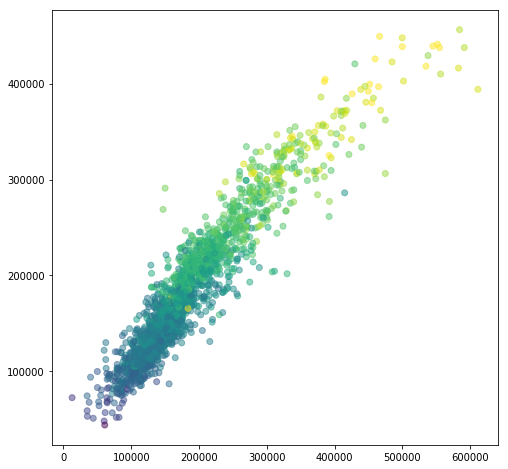

In [12]:
## Plotting the actuals against the predictions to find outliers
## Coloring model with one of my features (I looked at a few)
plt.figure(figsize=(8,8))
plt.scatter(df['SalePrice'], df['yhat'], c=df['QualMetric'], alpha=.5, cmap='viridis');

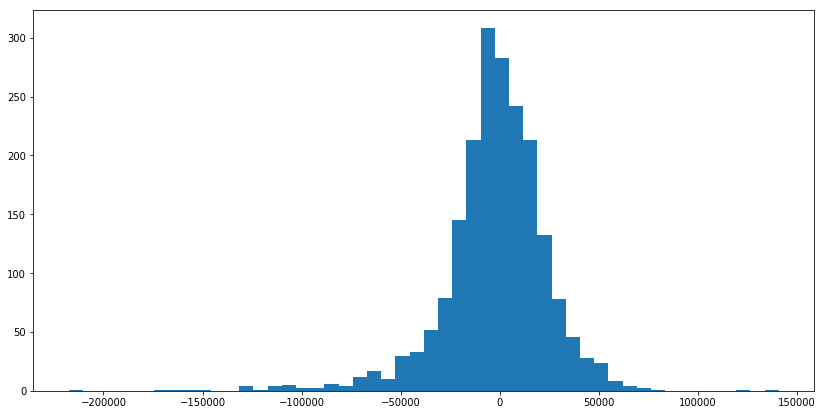

In [13]:
## Plotting errors on histogram to make sure it's normal(ish)
#### Would like to add KDE line
plt.figure(figsize=(14,7))
plt.hist(df['error'], bins=50);

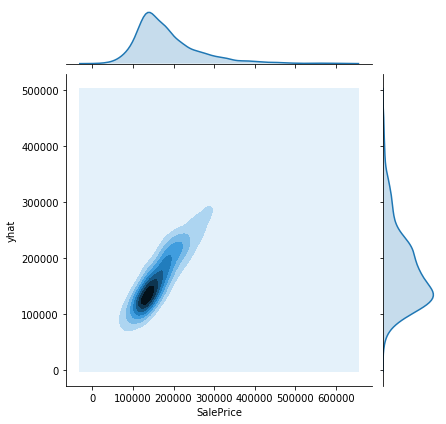

In [14]:
## (Plotting distribution of actual target vs predictions similar to 1st visualization)
sns.jointplot(df['SalePrice'],
              df['yhat'],
             kind = 'kde');

In [15]:
## Creating a dataframe where I can see what is abnormal about mis-predicted values
df_std_cols = list(train.select_dtypes(include=[np.number]).columns)
df_std_data = SS.fit_transform(train.select_dtypes(include=[np.number]))
df_std = pd.DataFrame(data=df_std_data, columns=df_std_cols)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [16]:
## Storing 5 most under predicted values
under_pred5 = list(df.sort_values(by='error').head(5).index)

In [17]:
## Examining 5 most under predicted to find indications of features that drove them away from model
df_std.loc[under_pred5].mean().sort_values()

MoSold                 -0.590326
PID                    -0.588258
Neighborhood_NAmes     -0.421970
HouseAge               -0.407387
EnclosedPorch          -0.377264
BsmtFinType2           -0.330817
MSSubClass_50          -0.326885
WoodDeckSF             -0.316171
BsmtFinSF2             -0.290730
Neighborhood_Edwards   -0.273766
Neighborhood_Somerst   -0.260141
BsmtHalfBath           -0.252125
MSSubClass             -0.233775
MSSubClass_30          -0.227585
KitchenAbvGr           -0.204568
Neighborhood_IDOTRR    -0.186583
Neighborhood_NoRidge   -0.154803
YrSold                 -0.133964
3SsnPorch              -0.102738
MiscVal                -0.089968
PoolArea               -0.063480
Id                     -0.060008
BsmtFullBath           -0.052676
BsmtCond               -0.032842
mansion                -0.031242
GarageCond              0.107952
BsmtFinType1            0.162968
OverallCond             0.215386
CentralAir              0.271702
ExterCond               0.306380
          

In [18]:
## Storing 5 most over predicted values
over_pred5 = list(df.sort_values(by='error').tail(5).index)

In [19]:
## Examining 5 most over predicted to find indications of features that drove them away from model
df_std.loc[over_pred5].mean().sort_values()

OverallCond            -1.052468
LotFrontage            -0.862445
YrSold                 -0.743862
HeatingQC              -0.579388
PID                    -0.551971
SalePrice              -0.504670
BsmtFullBath           -0.435418
SalePriceLog           -0.406048
BsmtFinSF1             -0.337244
HouseAge               -0.327839
MSSubClass_50          -0.326885
EnclosedPorch          -0.323780
BsmtFinType1           -0.320366
Neighborhood_OldTown   -0.293828
ScreenPorch            -0.287856
Neighborhood_Edwards   -0.273766
BsmtExposure           -0.261254
BsmtHalfBath           -0.252125
Neighborhood_NridgHt   -0.251486
MSSubClass_30          -0.227585
KitchenAbvGr           -0.204568
Neighborhood_IDOTRR    -0.186583
KitchenQual            -0.176294
Neighborhood_NoRidge   -0.154803
LowQualFinSF           -0.107977
3SsnPorch              -0.102738
MiscVal                -0.089968
MoSold                 -0.080134
PoolArea               -0.063480
BsmtCond               -0.032842
          

# 8) Running Model on Test Data<a name="RunningModel"></a>

In [20]:
## Establishing X and y for test data
test_filter = ['Neighborhood_Edwards', 'Neighborhood_IDOTRR', 'Neighborhood_NAmes',
               'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'TotalArea',
       'QualMetric', 'TotalBaths', 'PorchArea','mansion','YearRemod/Add']
X_test = test[test_filter]

## Using the power transform, which was identified as the best fit above
X_test_pt = pt.fit_transform(X_test)

/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [21]:
## Adding column for predicted Sale Prices
## Taking the exponent to 'un-log' the PowerTransformer
test['SalePrice'] = np.exp(ridge.predict(X_test_pt))

In [22]:
## Exporting my two columns to CSV
test[['Id','SalePrice']].to_csv('../submissions/JLove-Submit-test.csv', index=False)